0.023651599884033203
0.016962528228759766
0.016994953155517578
0.01754927635192871
0.01598072052001953
0.01698756217956543
0.016928672790527344
0.01662898063659668
0.01594853401184082
0.017244577407836914
0.016890287399291992
0.016052961349487305
0.016574382781982422
0.01611042022705078
0.01704549789428711
0.01657867431640625
0.016599178314208984
0.016933917999267578
0.016971588134765625
0.016735076904296875
0.0166323184967041
0.016742229461669922
0.016941070556640625
0.01627659797668457
0.01671743392944336
0.016286611557006836
0.016438961029052734
0.016850948333740234
0.017501354217529297
0.0164644718170166
0.016379594802856445
0.01646733283996582
0.016699552536010742
0.016979217529296875
0.01606583595275879
0.01694464683532715
0.016861677169799805
0.01674628257751465
0.016284704208374023
0.016736268997192383
0.016441822052001953
0.017110347747802734
0.016693592071533203
0.01730942726135254
0.0164797306060791
0.016315460205078125
0.016415119171142578
0.017143964767456055
0.01625442504

0.016000986099243164
0.01676797866821289
0.017192840576171875
0.016399145126342773
0.01666736602783203
0.016488075256347656
0.016812562942504883
0.016245126724243164
0.01691412925720215
0.016532421112060547
0.017417192459106445
0.01612401008605957
0.017169952392578125
0.01608586311340332
0.01654338836669922
0.017544031143188477
0.016148090362548828
0.016900062561035156
0.0164492130279541
0.016426801681518555
0.017208576202392578
0.01705145835876465
0.01621699333190918
0.016654253005981445
0.016523122787475586
0.016232728958129883
0.01697993278503418
0.016774892807006836
0.016584157943725586
0.017191648483276367
0.015885114669799805
0.017496109008789062
0.01685023307800293
0.016504526138305664
0.016278743743896484
0.016854047775268555
0.01677227020263672
0.016590118408203125
0.016389846801757812
0.016787052154541016
0.016594886779785156
0.017561912536621094
0.01584935188293457
0.017015695571899414
0.01645040512084961
0.01691579818725586
0.016413211822509766
0.017011642456054688
0.016886

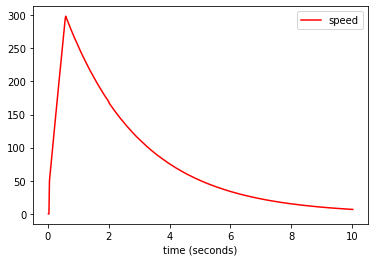

In [1]:
import sys
sys.path.append("../../")

from lib.data.dataplot import *
from lib.dds.dds import *
from lib.utils.time import *

dp = DataPlotter()
dp.set_x("time (seconds)")
dp.add_y("speed", "speed")

dds = DDS()
dds.start()

dds.subscribe(['speed'])
dds.publish('force', 5000.0, DDS.DDS_TYPE_FLOAT)

t = Time()
t.start()
while t.get() < 10:
    
    v = dds.wait('speed')
    
    delta_t = t.elapsed()
    print(delta_t)

    dds.publish('force', 0.0, DDS.DDS_TYPE_FLOAT)
    
    dp.append_x(t.get())
    dp.append_y("speed", v)

dp.plot()
